In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Графики чисел Бетти

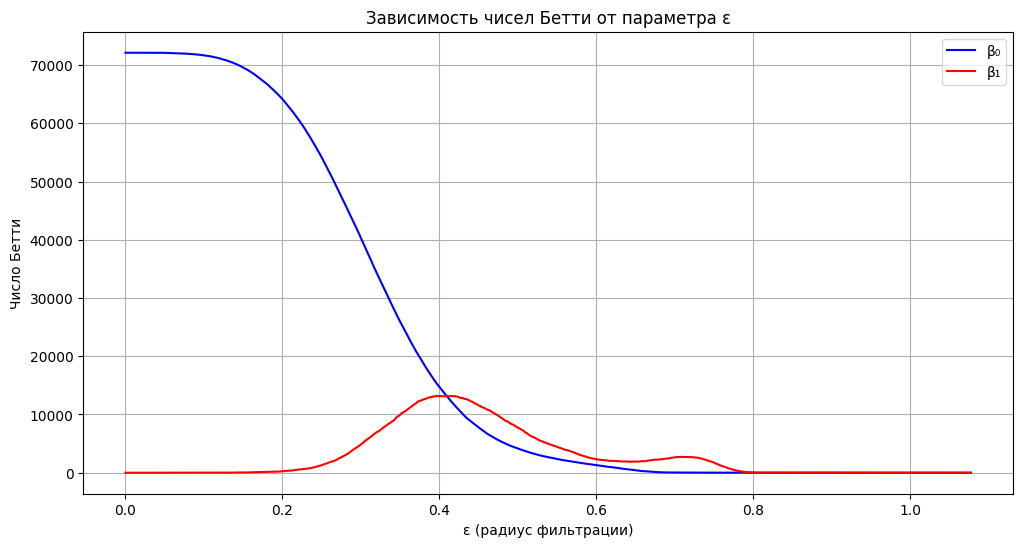

In [ ]:
# Загрузка данных (0D и 1D гомологии из всех 10 подмножеств)
def load_data(dim, n_subsets=10):
    births, deaths = [], []
    for i in range(n_subsets):
        data = np.load(f"h{dim}_norm_{i}.npy")  # dim = 0 или 1
        births.append(data[0])
        deaths.append(data[1])
    births = np.concatenate(births)
    deaths = np.concatenate(deaths)
    # Заменяем inf на максимальное конечное death * 1.5
    max_finite_death = np.max(deaths[np.isfinite(deaths)])
    deaths[np.isinf(deaths)] = max_finite_death * 1.5
    return births, deaths

# Загружаем все данные
births_0d, deaths_0d = load_data(0)  # 0-мерные гомологии
births_1d, deaths_1d = load_data(1)  # 1-мерные гомологии

# Определяем диапазон ε
eps_min = min(np.min(births_0d), np.min(births_1d))
eps_max = max(np.max(deaths_0d), np.max(deaths_1d))
epsilon_range = np.linspace(eps_min, eps_max, 1000)  # 1000 точек

# Вычисляем β₀(ε) и β₁(ε)
beta0 = [np.sum((births_0d <= eps) & (deaths_0d > eps)) for eps in epsilon_range]
beta1 = [np.sum((births_1d <= eps) & (deaths_1d > eps)) for eps in epsilon_range]

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(epsilon_range, beta0, label="β₀", color="blue")
plt.plot(epsilon_range, beta1, label="β₁", color="red")
plt.xlabel("ε (радиус фильтрации)")
plt.ylabel("Число Бетти")
plt.title("Зависимость чисел Бетти от параметра ε")
plt.legend()
plt.grid(True)
plt.show()

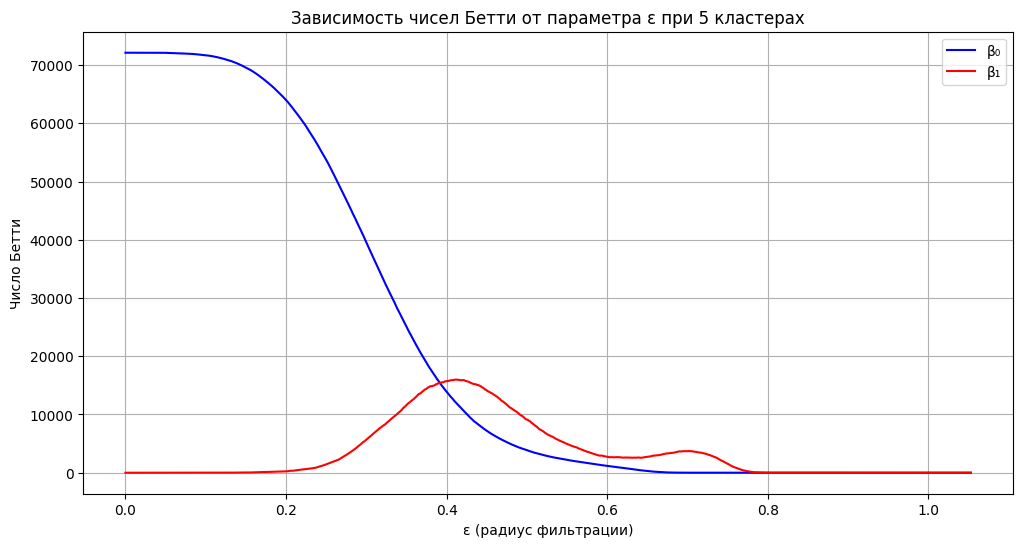

In [ ]:
# Загрузка данных (0D и 1D гомологии из всех 10 подмножеств)
def load_data(dim, n_subsets=5):
    births, deaths = [], []
    for i in range(n_subsets):
        data = np.load(f"h{dim}_norm_km5_{i}.npy")  # dim = 0 или 1
        births.append(data[0])
        deaths.append(data[1])
    births = np.concatenate(births)
    deaths = np.concatenate(deaths)
    # Заменяем inf на максимальное конечное death * 1.5
    max_finite_death = np.max(deaths[np.isfinite(deaths)])
    deaths[np.isinf(deaths)] = max_finite_death * 1.5
    return births, deaths

# Загружаем все данные
births_0d, deaths_0d = load_data(0)  # 0-мерные гомологии
births_1d, deaths_1d = load_data(1)  # 1-мерные гомологии

# Определяем диапазон ε
eps_min = min(np.min(births_0d), np.min(births_1d))
eps_max = max(np.max(deaths_0d), np.max(deaths_1d))
epsilon_range = np.linspace(eps_min, eps_max, 1000)  # 1000 точек

# Вычисляем β₀(ε) и β₁(ε)
beta0 = [np.sum((births_0d <= eps) & (deaths_0d > eps)) for eps in epsilon_range]
beta1 = [np.sum((births_1d <= eps) & (deaths_1d > eps)) for eps in epsilon_range]

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(epsilon_range, beta0, label="β₀", color="blue")
plt.plot(epsilon_range, beta1, label="β₁", color="red")
plt.xlabel("ε (радиус фильтрации)")
plt.ylabel("Число Бетти")
plt.title("Зависимость чисел Бетти от параметра ε при 5 кластерах")
plt.legend()
plt.grid(True)
plt.show()

## Сравнение

Сравнение кластеров с наибольшим количеством дыр (разные данные)

In [ ]:
partition_norm = np.load('ru_word_partition_norm.npy', allow_pickle=True)

In [ ]:
partition = np.load('ru_word_partition.npy', allow_pickle=True)

In [ ]:
dang = np.load('filtered_by_lifetimes_and_syn.npy', allow_pickle=True)
dang

array({'0': array([488]), '1111': array([400, 415, 435, 444, 470, 492])},
      dtype=object)

In [ ]:
partition_norm = list(partition_norm)
partition = list(partition)

In [ ]:
label_1111 = []
label_3 = []
for i in range(len(partition)):
  if str(partition[i]) == '1111':
    label_1111.append(i)
  if str(partition_norm[i]) == '3':
    label_3.append(i)



In [ ]:
len(label_1111), len(label_3)

(7980, 8874)

In [ ]:
intersection = set(label_1111).intersection(label_3)
len(intersection)

1934

In [ ]:
len(intersection)/len(label_1111)

0.24235588972431077

In [ ]:
len(intersection)/len(label_3)

0.2179400495830516

## Подсчет точек на границах

In [ ]:
from sklearn.neighbors import NearestNeighbors

def get_boundary_points(embeddings, labels, k=10):

    labels = np.array(labels, dtype=np.int32)

    nbrs = NearestNeighbors(n_neighbors=k).fit(embeddings)
    indices = nbrs.kneighbors(embeddings, return_distance=False)

    is_boundary = np.array([len(np.unique(labels[indices[i]])) > 1 for i in range(len(labels))])
    return embeddings[is_boundary]

In [ ]:
all_embeddings = np.load('ru_cbow_normalized_embeddings.npy', allow_pickle=True)

In [ ]:
boundary_points = get_boundary_points(
    embeddings=all_embeddings,
    labels=partition_norm,
    k=10
)

In [ ]:
len(boundary_points)

53018

## Сравнение центроидов

In [ ]:
cluster_3 = np.load('ru_word_norm_3.npy', allow_pickle=True)

In [ ]:
cluster_1 = np.load('ru_word_norm_1.npy', allow_pickle=True)

In [ ]:
cluster_8 = np.load('ru_word_norm_8.npy', allow_pickle=True)

In [ ]:
centroid_all = np.mean(all_embeddings, axis=0)  # Центр всех данных
centroid_cluster = np.mean(cluster_8, axis=0)  # Центр кластера 3

u = centroid_cluster / np.linalg.norm(centroid_cluster)
v = centroid_all / np.linalg.norm(centroid_all)

# Косинусное расстояние
cosine_sim = np.dot(u, v)
cosine_sim = np.clip(cosine_sim, -1.0, 1.0)  # Защита от переполнения
cosine_dist = 1 - cosine_sim

# Евклидово расстояние (для нормализованных центроидов)
euclidean_dist = np.linalg.norm(u - v)

# Проверка связи между метриками
print(f"Косинусное расстояние: {cosine_dist:.6f}")
print(f"Евклидово расстояние: {euclidean_dist:.6f}")
print(f"√(2 * cosine_dist): {np.sqrt(2 * cosine_dist):.6f}")

Косинусное расстояние: 0.029505
Евклидово расстояние: 0.242920
√(2 * cosine_dist): 0.242920


In [ ]:
print("Норма центроида кластера:", np.linalg.norm(centroid_cluster))
print("Норма общего центроида:", np.linalg.norm(centroid_all))

Норма центроида кластера: 0.21246368
Норма общего центроида: 0.28838912


In [ ]:
norms = np.linalg.norm(all_embeddings, axis=1)
print(norms)
print(np.mean(norms))

[1.         0.9999999  1.         ... 0.99999994 0.9999999  1.        ]
1.0


In [ ]:
norms = np.linalg.norm(cluster_3, axis=1)
print(norms)
print(np.mean(norms))

[1.         1.         0.99999994 ... 1.         1.         0.9999999 ]
1.0


In [ ]:
all_embeddings_dict = np.load('ru_cbow_dictionary.npy', allow_pickle=True).item()
all_embeddings = np.array(list(all_embeddings_dict.values()))

In [ ]:
cluster_1111 = np.load('ru_word_1111.npy', allow_pickle=True)

In [ ]:
cluster_10 = np.load('ru_word_10.npy', allow_pickle=True)

In [ ]:
cluster_1112 = np.load('ru_word_1112.npy', allow_pickle=True)

In [ ]:
# Предполагаем, что all_embeddings и cluster_3 — это ненормализованные эмбеддинги
centroid_all = np.mean(all_embeddings, axis=0)  # Центр всех данных
centroid_cluster = np.mean(cluster_1111, axis=0)   # Центр кластера 1111

# Косинусное сходство и расстояние (для ненормализованных векторов)
cosine_sim = np.dot(centroid_cluster, centroid_all) / (
    np.linalg.norm(centroid_cluster) * np.linalg.norm(centroid_all)
)
#cosine_sim = np.clip(cosine_sim, -1.0, 1.0)  # Защита от артефактов численных вычислений
cosine_dist = 1 - cosine_sim

# Евклидово расстояние (для ненормализованных векторов)
euclidean_dist = np.linalg.norm(centroid_cluster - centroid_all)

# Связь между метриками (только для нормализованных векторов не проверяется!)
print(f"Косинусное расстояние: {cosine_dist:.6f}")
print(f"Евклидово расстояние: {euclidean_dist:.6f}")

Косинусное расстояние: 0.077815
Евклидово расстояние: 0.698468


In [ ]:
f = np.load('filtered_by_lifetimes_norm.npy', allow_pickle=True).item()
f

{'4': np.int64(401),
 '8': -1,
 '1': np.int64(453),
 '3': np.int64(0),
 '5': -1,
 '6': np.int64(455),
 '9': np.int64(463),
 '2': np.int64(445),
 '0': np.int64(217),
 '7': np.int64(491)}

In [ ]:
f = np.load('filtered_by_lifetimes_and_syn.npy', allow_pickle=True).item()
f

{'0': array([488]), '1111': array([400, 415, 435, 444, 470, 492])}